In [23]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

learning_rate = 1e-3
batch_size = 64
epochs = 50

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)


In [24]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [25]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    sum_loss = 0

    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    return sum_loss / len(dataloader)

In [26]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss

In [27]:
def run_training(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):
    test_losses = []
    train_losses = []
    for t in range(epochs):
        print(f'Epoch {t+1}\n-------------------------------')
        train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss = test_loop(test_dataloader, model, loss_fn)
        test_losses.append(test_loss)
        train_losses.append(train_loss)
    print("Done!")
    
    return test_losses, train_losses

In [28]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

ADAM

In [29]:
model = NeuralNetwork()
optimizer_adam = torch.optim.Adam(model.parameters(), lr=learning_rate)
test_loss_adam, train_loss_adam = run_training(epochs, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_adam)

Epoch 1
-------------------------------
loss: 2.288990  [   64/60000]
loss: 0.563236  [ 6464/60000]
loss: 0.403090  [12864/60000]
loss: 0.509981  [19264/60000]
loss: 0.446764  [25664/60000]
loss: 0.407349  [32064/60000]
loss: 0.380269  [38464/60000]
loss: 0.496965  [44864/60000]
loss: 0.479963  [51264/60000]
loss: 0.495573  [57664/60000]
Test Error: 
 Accuracy: 84.1%, Avg loss: 0.428464 

Epoch 2
-------------------------------
loss: 0.270011  [   64/60000]
loss: 0.342845  [ 6464/60000]
loss: 0.287101  [12864/60000]
loss: 0.361154  [19264/60000]
loss: 0.421832  [25664/60000]
loss: 0.359711  [32064/60000]
loss: 0.304164  [38464/60000]
loss: 0.503106  [44864/60000]
loss: 0.384096  [51264/60000]
loss: 0.438045  [57664/60000]
Test Error: 
 Accuracy: 85.0%, Avg loss: 0.400286 

Epoch 3
-------------------------------
loss: 0.222764  [   64/60000]
loss: 0.306468  [ 6464/60000]
loss: 0.210133  [12864/60000]
loss: 0.305480  [19264/60000]
loss: 0.442354  [25664/60000]
loss: 0.353811  [32064/600

RMS

In [30]:
model = NeuralNetwork()
optimizer_rms = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)
test_loss_rms, train_loss_rms = run_training(epochs, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_rms)

Epoch 1
-------------------------------
loss: 2.306525  [   64/60000]
loss: 0.556579  [ 6464/60000]
loss: 0.464378  [12864/60000]
loss: 0.473598  [19264/60000]
loss: 0.458191  [25664/60000]
loss: 0.456826  [32064/60000]
loss: 0.389520  [38464/60000]
loss: 0.534753  [44864/60000]
loss: 0.540670  [51264/60000]
loss: 0.413152  [57664/60000]
Test Error: 
 Accuracy: 82.2%, Avg loss: 0.471820 

Epoch 2
-------------------------------
loss: 0.270657  [   64/60000]
loss: 0.337435  [ 6464/60000]
loss: 0.298469  [12864/60000]
loss: 0.356791  [19264/60000]
loss: 0.359960  [25664/60000]
loss: 0.390522  [32064/60000]
loss: 0.287092  [38464/60000]
loss: 0.449960  [44864/60000]
loss: 0.427324  [51264/60000]
loss: 0.342492  [57664/60000]
Test Error: 
 Accuracy: 84.4%, Avg loss: 0.446824 

Epoch 3
-------------------------------
loss: 0.239766  [   64/60000]
loss: 0.342745  [ 6464/60000]
loss: 0.235767  [12864/60000]
loss: 0.307944  [19264/60000]
loss: 0.332904  [25664/60000]
loss: 0.444000  [32064/600

Стохастический градиентный спуск

In [31]:
model = NeuralNetwork()
optimizer_sgd = torch.optim.SGD(model.parameters(), lr = learning_rate)
test_loss_sgd, train_loss_sgd = run_training(epochs, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_sgd)

Epoch 1
-------------------------------
loss: 2.295458  [   64/60000]
loss: 2.291636  [ 6464/60000]
loss: 2.280373  [12864/60000]
loss: 2.271858  [19264/60000]
loss: 2.248840  [25664/60000]
loss: 2.228817  [32064/60000]
loss: 2.227360  [38464/60000]
loss: 2.197168  [44864/60000]
loss: 2.184432  [51264/60000]
loss: 2.166506  [57664/60000]
Test Error: 
 Accuracy: 50.5%, Avg loss: 2.157278 

Epoch 2
-------------------------------
loss: 2.159163  [   64/60000]
loss: 2.152977  [ 6464/60000]
loss: 2.104247  [12864/60000]
loss: 2.113310  [19264/60000]
loss: 2.066948  [25664/60000]
loss: 2.021367  [32064/60000]
loss: 2.029563  [38464/60000]
loss: 1.961783  [44864/60000]
loss: 1.955551  [51264/60000]
loss: 1.890450  [57664/60000]
Test Error: 
 Accuracy: 57.4%, Avg loss: 1.887830 

Epoch 3
-------------------------------
loss: 1.916389  [   64/60000]
loss: 1.888939  [ 6464/60000]
loss: 1.781210  [12864/60000]
loss: 1.805724  [19264/60000]
loss: 1.706525  [25664/60000]
loss: 1.669209  [32064/600

In [48]:
result = {}
result["Adam"] = {"test_loss": test_loss_adam, "train_loss": train_loss_adam}
result["RMS"] = {"test_loss": test_loss_rms, "train_loss": train_loss_rms}
result["SGD"] = {"test_loss": test_loss_sgd, "train_loss": train_loss_sgd}

for k, v in result.items():
    print(f"{k}: {v}")

Adam: {'test_loss': [(0.841, 0.4284637858913203), (0.8495, 0.40028636385301114), (0.8633, 0.36528997123241425), (0.8618, 0.38161341010764904), (0.8744, 0.3477449723679549), (0.8784, 0.34876931895306157), (0.8797, 0.34801783797087943), (0.8788, 0.3529040606538202), (0.8825, 0.3548789347765172), (0.8804, 0.37301091104745865), (0.8765, 0.38102550664620033), (0.8763, 0.3900404196873212), (0.8778, 0.3915993753749474), (0.8765, 0.4144061433898795), (0.8863, 0.40414779566845316), (0.8806, 0.3977146002042825), (0.8806, 0.417513522752531), (0.8818, 0.45944187422371974), (0.8794, 0.4351686037080303), (0.8813, 0.45112618803977966), (0.8755, 0.5792466714313835), (0.8793, 0.4973448121528717), (0.88, 0.5004948148278484), (0.8753, 0.48865156350242106), (0.8725, 0.545006678282479), (0.8858, 0.5228306786090456), (0.8813, 0.5764623101160025), (0.8839, 0.564555511424306), (0.8853, 0.5710639956935196), (0.8819, 0.586798692697505), (0.8842, 0.5943956234177966), (0.8889, 0.5619748539890453), (0.8812, 0.6101

In [33]:
# Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма)
# от выбора оптимизационного метода
# количество эпох = 50
# Сравните, сделайте выводы
# https://pytorch.org/docs/stable/optim.html

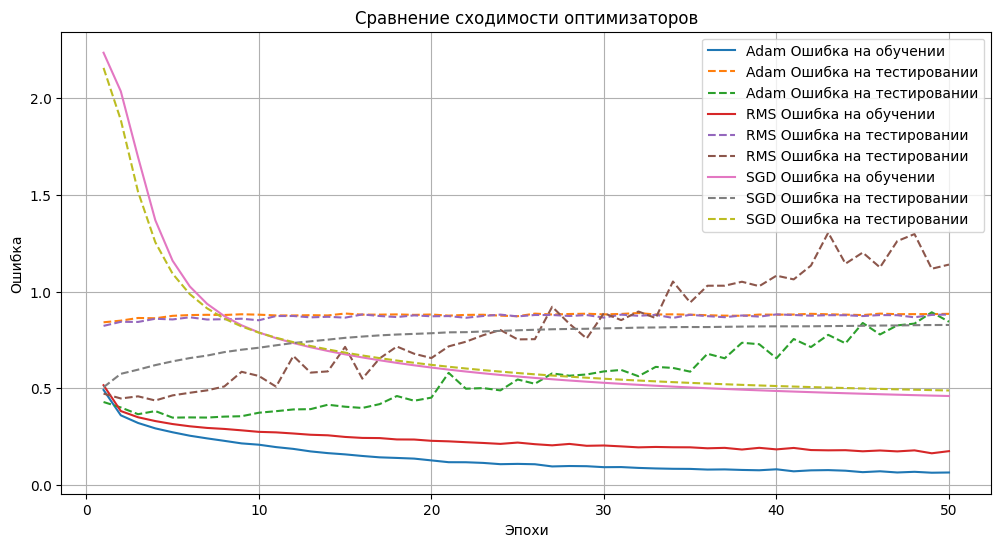

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for name, loss in result.items():
    plt.plot(range(1, epochs + 1), loss["train_loss"], label=f"{name} Ошибка на обучении")
    plt.plot(range(1, epochs + 1), loss["test_loss"], linestyle="--", label=f"{name} Ошибка на тестировании")

plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Сравнение сходимости оптимизаторов')
plt.grid(True)
plt.legend()
plt.show()

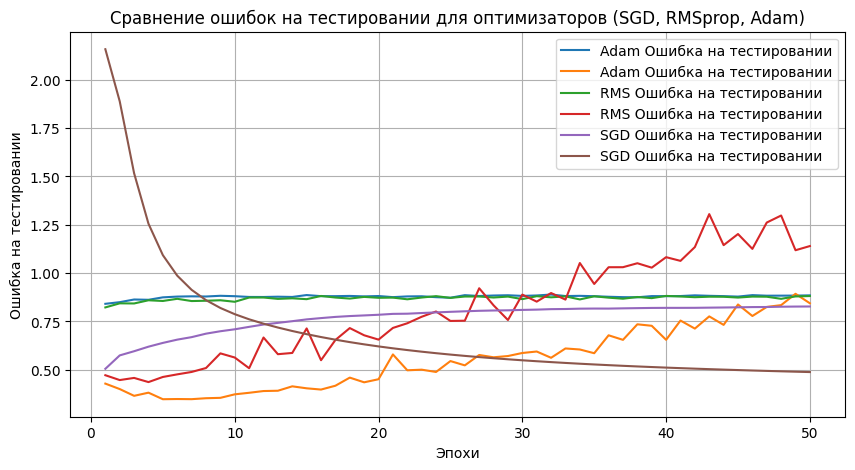

In [39]:
plt.figure(figsize=(10, 5))

for name, loss in result.items():
    plt.plot(range(1, epochs + 1), loss["test_loss"], label=f"{name} Ошибка на тестировании")

plt.xlabel('Эпохи')
plt.ylabel('Ошибка на тестировании')
plt.title('Сравнение ошибок на тестировании для оптимизаторов (SGD, RMSprop, Adam)')
plt.grid(True)
plt.legend()

# Показать график
plt.show()

На первых эпохах SGD демонстрирует быстрое снижение ошибки, но затем его сходимость замедляется, и ошибка может либо колебаться, либо уменьшаться менее эффективно.

RMSprop и Adam, благодаря адаптивной настройке скорости обучения для каждого параметра, обычно показывают более стабильное и быстрое снижение ошибки.
